<a href="https://colab.research.google.com/github/john-jehiel/cards-image-classification/blob/main/cards_image_classification_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the dataset from kaggle

In [ ]:
pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\jnjeh\Downloads\kaggle (1).json'

In [ ]:
!kaggle datasets download gpiosenka/cards-image-datasetclassification/

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification/versions/
License(s): CC0-1.0
 95% 367M/385M [00:02<00:00, 179MB/s]
100% 385M/385M [00:02<00:00, 161MB/s]


In [ ]:
import zipfile
import os

# Specify the path to the downloaded dataset
zip_file_path = "/content/cards-image-datasetclassification.zip"
extract_to = "cards-image-datasetclassification"

# Extract the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Dataset extracted to {extract_to}")


Dataset extracted to cards-image-datasetclassification


### Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import load_model, Model

### Specify data directories

In [ ]:
train_dir = "/content/cards-image-datasetclassification/train/"
valid_dir = "/content/cards-image-datasetclassification/valid/"
test_dir = "/content/cards-image-datasetclassification/test/"

### Initiatize parameters

In [ ]:
image_size = (224, 224)
batch_size = 32
num_classes = 53

### Data preprocessing

In [ ]:
datagen_train = ImageDataGenerator(rescale=1.0/255.0)

datagen_test = ImageDataGenerator(rescale=1.0/255.0)

datagen_valid = ImageDataGenerator(rescale=1.0/255.0)

In [ ]:
train_generator = datagen_train.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = datagen_valid.flow_from_directory(
    valid_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen_valid.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 7624 images belonging to 53 classes.
Found 265 images belonging to 53 classes.
Found 265 images belonging to 53 classes.


### Build the EfficientNet model

In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=3)

### Train the model

In [ ]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 71s 299ms/step - accuracy: 0.3791 - loss: 2.3348 - val_accuracy: 0.0312 - val_loss: 3.9720
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9375 - loss: 0.3711 - val_accuracy: 0.0000e+00 - val_loss: 4.0720
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 46s 162ms/step - accuracy: 0.8662 - loss: 0.4529 - val_accuracy: 0.5430 - val_loss: 1.7986
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.4517 - val_accuracy: 0.6667 - val_loss: 0.9606
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 34s 142ms/step - accuracy: 0.9193 - loss: 0.2617 - val_accuracy: 0.9453 - val_loss: 0.1918
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.9062 - loss: 0.2229 - val_accuracy: 0.7778 - val_loss: 0.5161
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.9508 - loss: 0.1811 - val_accuracy: 0.9570 - val_loss: 0.2081
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.9375 - loss: 0.22

### Model evaluation

In [ ]:
print("Evaluating on training data:")
results = model.evaluate(train_generator)
print(f"Training Loss: {results[0]:.4f}")
print(f"training Accuracy: {results[1]:.4f}")

\Evaluating on training data:
239/239 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.9306 - loss: 0.2288
Training Loss: 0.2200
training Accuracy: 0.9309


In [ ]:
print("Evaluating on testing data:")
results = model.evaluate(test_generator)
print(results)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")


Evaluating on testing data:
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9686 - loss: 0.1105
[0.13906794786453247, 0.9584905505180359]
Test Loss: 0.1391
Test Accuracy: 0.9585


In [ ]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 901ms/step

Classification Report:
                   precision    recall  f1-score   support

     ace of clubs       1.00      1.00      1.00         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       1.00      1.00      1.00         5
    ace of spades       1.00      1.00      1.00         5
   eight of clubs       1.00      1.00      1.00         5
eight of diamonds       1.00      1.00      1.00         5
  eight of hearts       0.83      1.00      0.91         5
  eight of spades       1.00      0.80      0.89         5
    five of clubs       1.00      1.00      1.00         5
 five of diamonds       1.00      1.00      1.00         5
   five of hearts       1.00      1.00      1.00         5
   five of spades       1.00      1.00      1.00         5
    four of clubs       1.00      1.00      1.00         5
 four of diamonds       1.00      1.00      1.00         5
   four of hearts       0.83      1.00      0.91  

### Plot training and validation loss

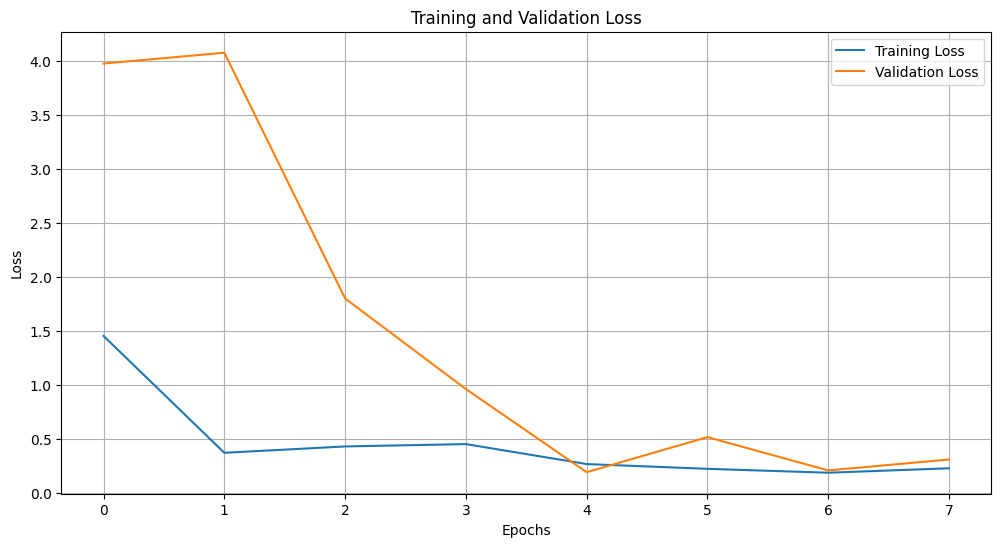

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### Plot training and validation accuracy

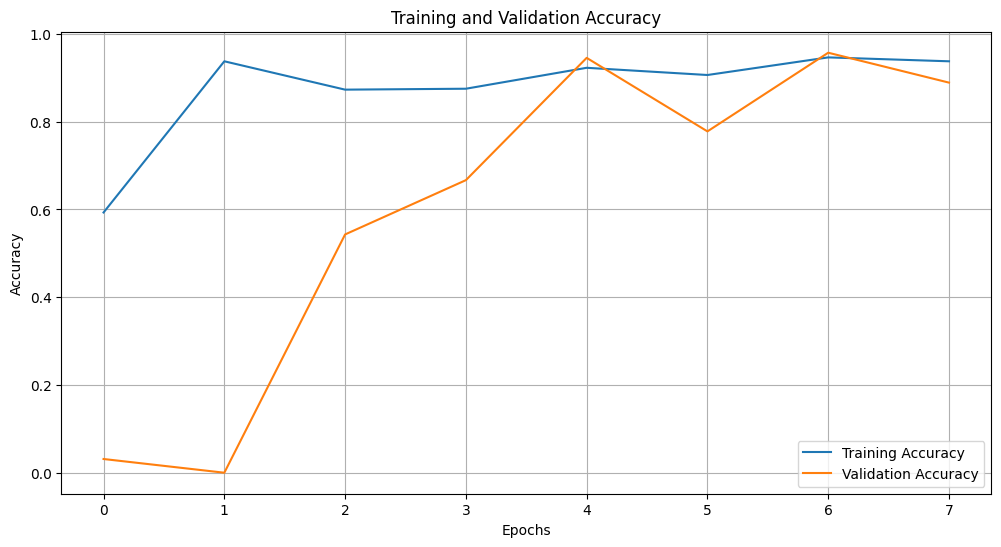

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

### Save the model

In [ ]:
model.save("EfficientNet_v1.h5")
print("Model saved")

Model saved


In [ ]:
loaded_model = load_model("EfficientNet_v1.h5")
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Recompile the loaded model
loaded_model.compile(optimizer='adam',  # Use the same optimizer as before
                     loss='categorical_crossentropy',  # Use the same loss function
                     metrics=['accuracy'])

In [ ]:
loaded_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 224, 224, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,220,376 (16.10 MB)

 Trainable params: 4,178,353 (15.94 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report on Test data:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 739ms/step

Classification Report on Test data:
                   precision    recall  f1-score   support

     ace of clubs       1.00      1.00      1.00         5
  ace of diamonds       1.00      1.00      1.00         5
    ace of hearts       1.00      1.00      1.00         5
    ace of spades       1.00      1.00      1.00         5
   eight of clubs       1.00      1.00      1.00         5
eight of diamonds       1.00      1.00      1.00         5
  eight of hearts       0.83      1.00      0.91         5
  eight of spades       1.00      0.80      0.89         5
    five of clubs       1.00      1.00      1.00         5
 five of diamonds       1.00      1.00      1.00         5
   five of hearts       1.00      1.00      1.00         5
   five of spades       1.00      1.00      1.00         5
    four of clubs       1.00      1.00      1.00         5
 four of diamonds       1.00      1.00      1.00         5
   four of hearts       0.83      1.0

In [ ]:
def predict_single_image(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image) / 255.0  # Normalize the image
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = loaded_model.predict(image_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    predicted_label = class_labels[predicted_class]

    # Display the predicted class
    print(f"Predicted Class: {predicted_label}")

    # Display the image
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Class: six of spades


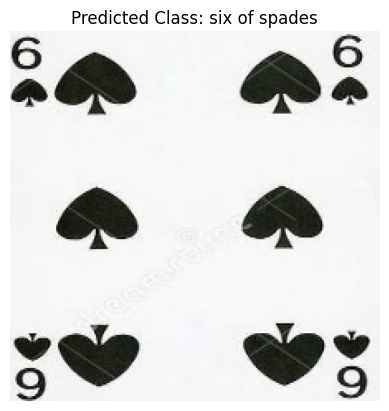

In [ ]:
predict_single_image("/content/cards-image-datasetclassification/valid/six of spades/1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[5.0280125e-10 1.5774924e-08 1.0967819e-07 2.8621471e-08 6.7032724e-06
  7.1957265e-03 9.9214751e-01 3.5267807e-05 2.7438200e-06 6.8555801e-07
  1.7516017e-05 3.6820580e-08 1.6917836e-07 6.7739139e-09 2.0952631e-07
  1.6368354e-08 4.2297836e-09 2.8048015e-09 1.8976401e-08 4.1949100e-11
  4.1065515e-08 9.6941006e-09 4.5251811e-09 5.7094784e-08 1.2667919e-08
  1.1583921e-08 4.9472743e-07 3.7755079e-05 1.7677537e-07 1.1900999e-08
  5.1407291e-08 4.1213212e-07 2.6188089e-09 5.1033219e-08 4.3661018e-08
  1.7165220e-07 1.8573211e-10 1.3915192e-06 4.0885334e-06 5.1522715e-04
  7.3745036e-07 9.0919601e-09 1.9182160e-07 1.9783860e-05 6.9191898e-08
  4.0910157e-07 1.0043735e-05 1.7182476e-06 5.9970984e-09 2.9547578e-09
  3.1670325e-08 1.6851510e-07 3.1056804e-09]]
[6]
Predicted Class: eight of hearts


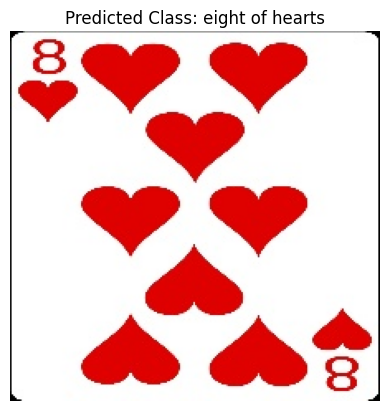

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[5.5899823e-11 3.5208172e-09 2.4732067e-08 3.2602383e-09 2.3716861e-07
  1.2730730e-03 9.9742472e-01 1.9284346e-06 5.1563882e-07 3.4403564e-07
  6.0728769e-05 1.7466554e-08 2.9228556e-08 2.0245980e-09 5.0304472e-08
  7.2896200e-09 9.6128649e-10 4.5489965e-10 3.1868961e-09 7.9847648e-12
  4.9814255e-09 1.7130837e-09 4.0922485e-10 5.9854566e-09 1.8883823e-09
  1.9564776e-09 5.1705797e-07 1.8392710e-04 1.4005418e-07 1.3585718e-09
  1.9305524e-08 1.4808053e-07 1.3792293e-09 5.6957630e-09 5.9806524e-09
  4.0126864e-07 7.7852662e-11 4.7916825e-07 6.5736731e-06 1.0190679e-03
  1.1453766e-06 1.8644393e-09 1.0678421e-07 2.3446813e-05 1.6967052e-08
  5.2864738e-08 1.6564862e-06 5.1745752e-07 1.1948262e-09 2.4186984e-09
  1.2618828e-08 4.0159499e-08 6.0463362e-10]]
[6]
Predicted Class: eight of hearts


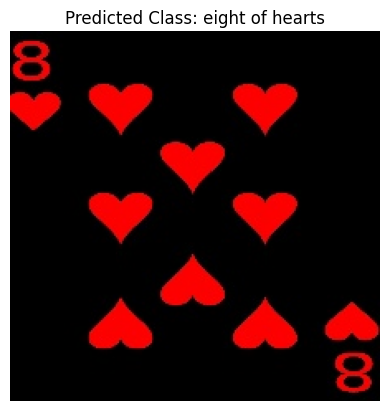

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[5.17893151e-09 5.87426030e-07 6.19336197e-06 6.87685485e-07
  3.03737806e-06 1.94311142e-01 8.02318454e-01 2.65379995e-03
  7.11093662e-06 7.70819388e-05 3.37616802e-05 4.94420146e-06
  1.05674424e-07 7.38036050e-08 1.72028464e-07 5.84311373e-08
  2.33538501e-07 2.03227302e-07 2.97462702e-06 2.62913531e-08
  5.71770613e-08 2.19580031e-07 9.69362475e-08 1.17533000e-06
  2.72156399e-06 3.73179532e-09 6.30380555e-06 4.12054724e-05
  2.77033405e-06 3.11289945e-08 1.25223994e-06 2.86437398e-07
  1.08171907e-08 2.95037950e-07 3.19944888e-06 4.45672686e-06
  7.18249282e-08 2.58032145e-07 2.78033644e-06 7.58875058e-06
  9.82560238e-08 8.42003534e-09 1.68958286e-05 1.94267941e-05
  7.68114489e-07 2.29769989e-06 4.58831462e-04 5.36160042e-06
  1.50560780e-07 3.21091704e-08 4.96441146e-07 1.66574708e-07
  8.36234264e-08]]
[6]
Predicted Class: eight of hearts


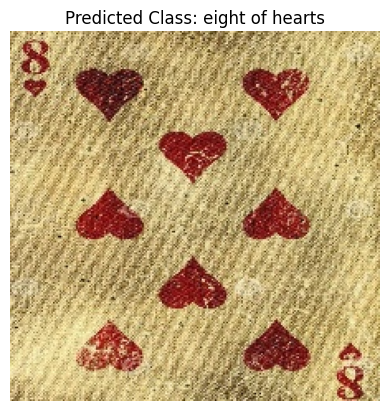

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[2.9073786e-09 2.8860828e-07 1.9800252e-06 4.8375631e-07 9.2774881e-06
  8.7695420e-03 9.8650348e-01 5.0827942e-04 1.3089109e-05 2.5471134e-06
  1.7552971e-05 1.9910274e-07 1.1087504e-06 8.9133046e-08 5.6479084e-06
  1.3730407e-07 1.8257884e-08 4.3847535e-08 2.0230569e-07 2.7797314e-10
  1.0102410e-07 5.5084158e-08 5.5418440e-08 1.0130509e-06 7.7950943e-08
  7.8750602e-08 7.2149965e-07 4.7739271e-05 6.3172405e-07 4.0009624e-08
  7.0350080e-07 2.5877318e-05 9.0990078e-08 8.6582730e-08 1.4466562e-07
  1.5045831e-07 2.1261426e-09 6.2911331e-06 3.3754855e-05 3.9935904e-03
  9.6866388e-06 3.5454406e-08 2.3186300e-07 2.2965201e-05 9.1897607e-07
  4.6461949e-07 1.6652866e-05 2.2238255e-06 1.5175285e-08 2.6792406e-09
  5.9849540e-08 1.5748695e-06 2.3428523e-08]]
[6]
Predicted Class: eight of hearts


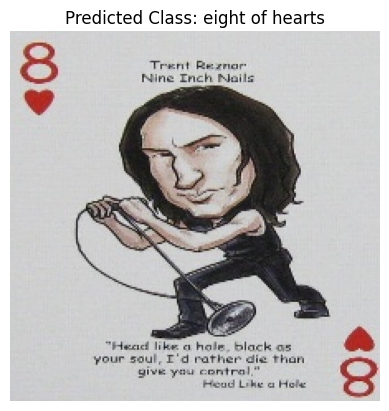

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[5.9669997e-10 5.8048823e-08 1.2652617e-06 9.5235791e-08 1.5767175e-06
  3.2852951e-03 9.9304926e-01 1.5102848e-04 2.9513258e-06 3.2286982e-06
  1.1088073e-04 1.0552711e-06 5.5613942e-08 7.3861353e-09 1.8497416e-07
  2.4929944e-08 7.7790112e-09 7.8008817e-09 5.8505446e-08 1.4766205e-10
  8.0969169e-09 1.2126755e-08 3.3978083e-09 4.5279926e-08 1.2292470e-08
  1.8764169e-08 4.5751517e-07 8.6774773e-05 1.4260208e-06 1.9829990e-08
  1.9393559e-07 5.7177485e-06 3.2692252e-08 1.1322928e-08 6.8147652e-09
  1.7468999e-07 2.6026670e-09 2.7795056e-06 5.5837741e-06 3.1162347e-03
  4.3486184e-06 2.4601745e-08 4.5427478e-07 1.5890687e-04 6.1029050e-07
  6.6014849e-08 7.7167188e-06 1.1773141e-06 9.3550785e-09 3.6008134e-09
  7.3239326e-09 1.2282058e-07 6.8153367e-09]]
[6]
Predicted Class: eight of hearts


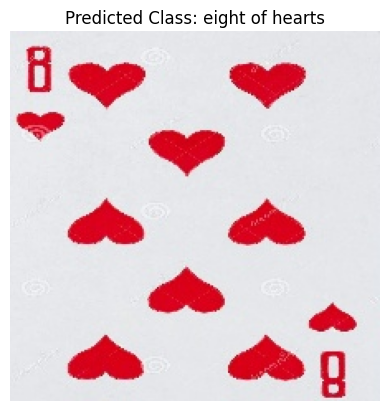

In [ ]:
for i in range(1,6):
  predict_single_image(f"/content/cards-image-datasetclassification/valid/eight of hearts/{i}.jpg")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


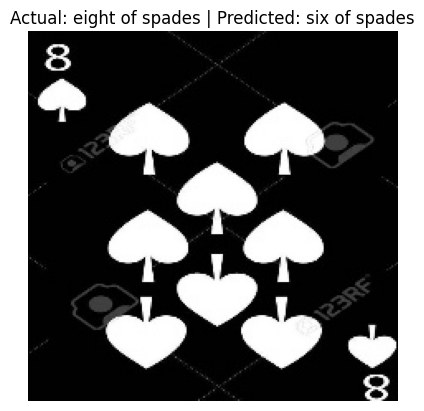

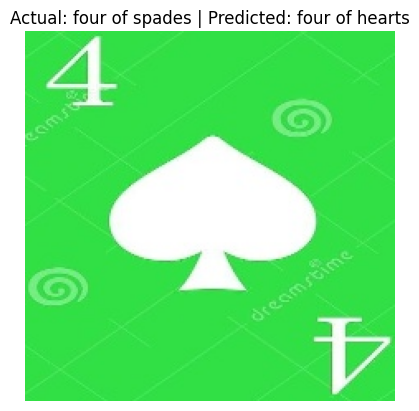

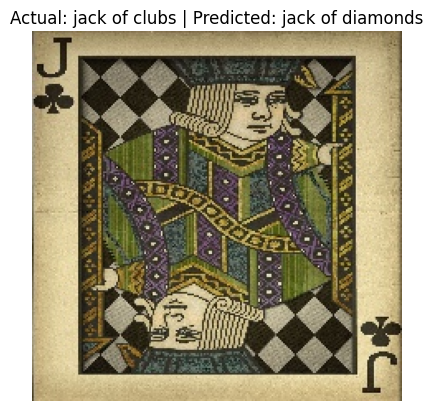

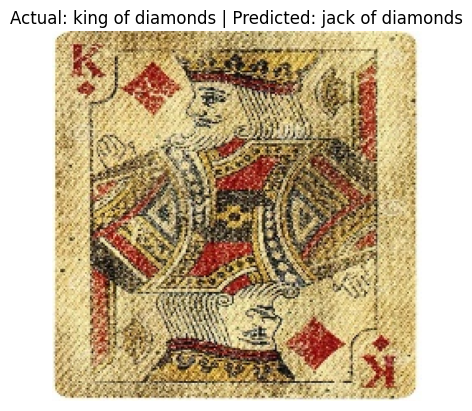

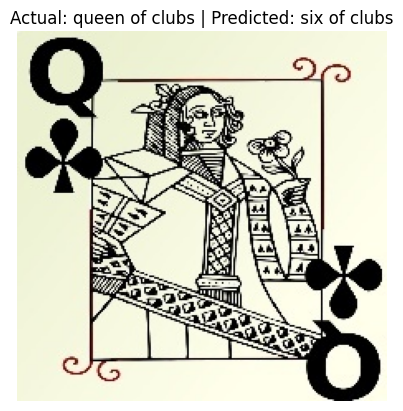

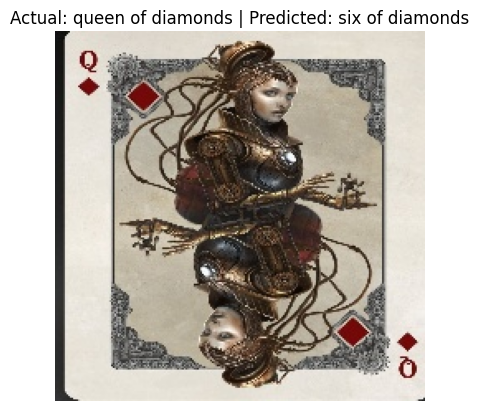

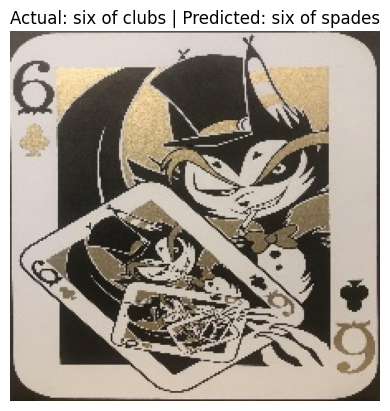

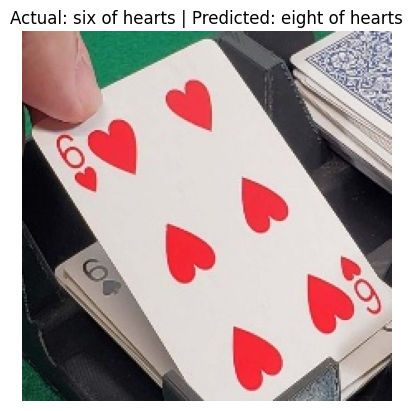

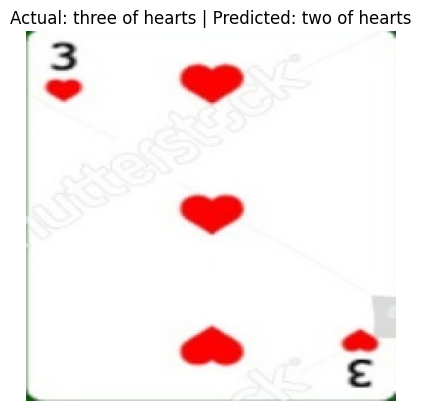

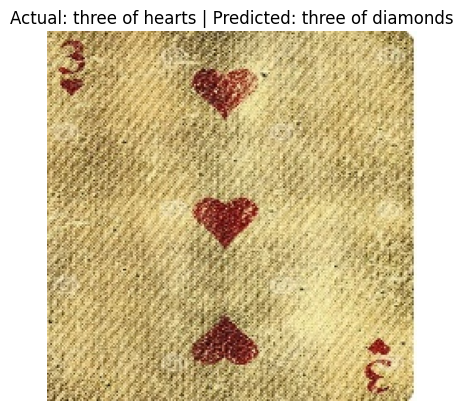

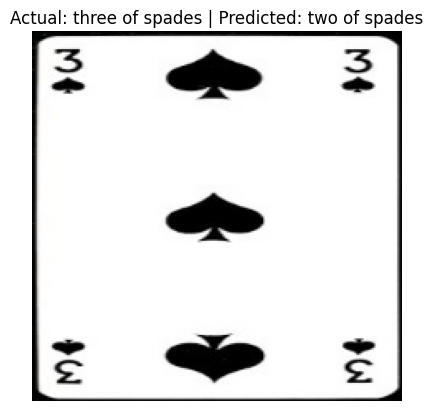

In [ ]:
predictions = loaded_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Identify incorrectly predicted images
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Display incorrect predictions
for i in incorrect_indices:
    # Get the image path corresponding to the index
    image_path = test_generator.filepaths[i]

    # Load and display the image
    image = load_img(image_path, target_size=(224, 224))  # Adjust size if necessary
    plt.imshow(image)

    # Get predicted and true labels
    predicted_label = class_labels[predicted_classes[i]]
    actual_label = class_labels[true_classes[i]]

    # Show the title with actual and predicted labels
    plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
    plt.axis('off')  # Hide axes
    plt.show()
